# UCLA CS161, Homework 9


## Import Modules


In [5]:
# Numpy: matrix algebra library
import numpy as np

# PyTorch: deep learning library
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

# matplotlib: visualization library
import matplotlib.pyplot as plt

%matplotlib inline
torch.set_num_threads(2)

## Load Dataset

In [6]:
# Define a normalization function
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download MNIST digits dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

# Make test and train set data loaders
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)
# we have 10 classes 0 to 9
classes = list(range(10))

## Visualize Input Images

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x104898dd8>>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/anaconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 86, in rebuild_storage_filename
    storage = cls._new_shared_filename(manager, handle, size)
RuntimeError: Interrupted system call at /Users/soumith/minicondabuild3/conda-bld/pytorch_1524590658547/work/torch/lib/libshm/core.cpp:125


(-0.5, 241.5, 121.5, -0.5)

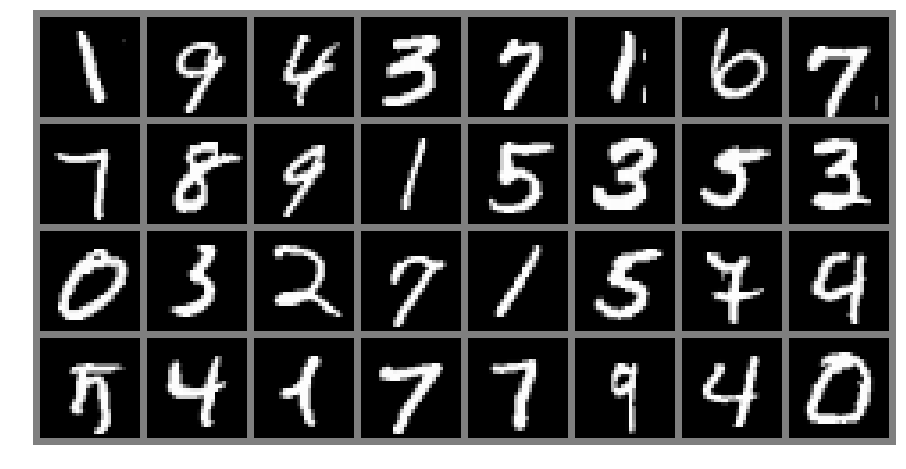

In [7]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
plt.figure(figsize=(16,8))
imshow(torchvision.utils.make_grid(images[:32]))
plt.axis('off')

## Network Definition



In [8]:
class FCNet(nn.Module):
    def __init__(self):
        """
        initialize the network, define the layers
        """
        super(FCNet, self).__init__()
        self.fc1 = nn.Linear(1*28*28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        
    def forward(self, x):
        """
        define the forward path computation
        """
        x = x.view(-1, 1*28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = FCNet()

## Define the Loss Function and Optimizer

In [9]:
# define the loss function and optomizer 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

## Train the Network


In [10]:
# max interations to run, 10^100 is merely a very large value used to disable the functionality.
MAX_ITERS = 1000

iter_cnt = 0

# loop over the dataset multiple times
for epoch in range(2):  
    for i, data in enumerate(trainloader, 0):
        iter_cnt += 1
        if iter_cnt > MAX_ITERS:
            break
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        if i % 100 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, loss.item()))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 2.302
[1,   101] loss: 0.525
[1,   201] loss: 0.332
[1,   301] loss: 0.239
[1,   401] loss: 0.053
[1,   501] loss: 0.244
[1,   601] loss: 0.293
[1,   701] loss: 0.252
[1,   801] loss: 0.085
[1,   901] loss: 0.149
[2,     1] loss: 0.303
Finished Training


## Prediction Examples

GroundTruth:      7     2     1     0     4     1     4
Predicted:        7     2     1     0     4     1     4


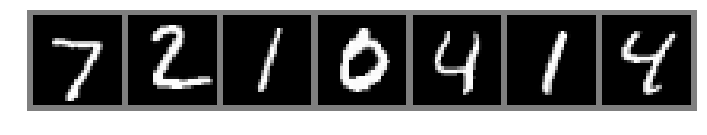

In [11]:
# get a test data batch
dataiter = iter(testloader)
images, labels = dataiter.next()

# pick the first 7 samples
images = images[:7]
labels = labels[:7]

# print images
plt.figure(figsize=(12,6))
imshow(torchvision.utils.make_grid(images))
plt.axis('off')
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(7)))

# make predictions
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(7)))

## Measure the Test Accuracy

In [12]:
correct = 0 # counts the number of correct classifications
total = 0 # counts the total nunber of classifications
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# calculate the average accuracy
print('Accuracy of the network on the %d test images: %d %%' % (total,
    100 * correct / total))
print(total, 100 * correct / total)

Accuracy of the network on the 10000 test images: 95 %
10000 95.02


In [ ]:
[55.05, 84.2, 87.6, 90.13, 91.76, 93.14, 92.84, 93.7, 94.63, 94.96, 94.56, 95.02]